In [15]:
# for KNN 
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score
# # for decision tree
# import matplotlib.pyplot as mtp  
# %matplotlib inline
# # for linear regression
# from sklearn.linear_model import LinearRegression
# import seaborn as sns
# # for SVM
# from sklearn import svm, datasets
# from sklearn.pipeline import make_pipeline
# from  sklearn.preprocessing import StandardScaler
# # for CNN
# # !pip install tensorflow
# from keras.datasets import mnist
# from keras.models import Sequential
# from keras.layers import Dense,Dropout
# from keras.utils import np_utils
# from keras.utils import plot_model
# from sklearn.model_selection import train_test_split
# from numpy import loadtxt 
# # for Scikit learn 
# from sklearn import kernel_approximation
# from sklearn.svm import SVC
# # for GBDT
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from sklearn.datasets import load_boston
# from sklearn.metrics import mean_absolute_error

In [16]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
# for decision tree
import matplotlib.pyplot as mtp  
%matplotlib inline
# for linear regression
from sklearn.linear_model import LinearRegression
import seaborn as sns
# for SVM
from sklearn import svm, datasets
from sklearn.pipeline import make_pipeline
from  sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [17]:
data=pd.read_csv('mood of child.csv')
data.head()

,Heart Rate,Pulse Rate,Temperature,Skin Senstivity,Result
0,70.0,86.0,98.0,3.2,Fear
1,60.0,85.0,96.9,0.9,Sad
2,80.0,84.0,98.7,1.8,Shame
3,67.0,74.0,98.9,3.0,Shame
4,64.0,79.0,96.8,2.3,Fear


In [18]:
data.isnull().sum()

Heart Rate         26
Pulse Rate         20
Temperature        27
Skin Senstivity    20
Result              0
dtype: int64

In [19]:
data['Heart Rate'].fillna(data['Heart Rate'].mean(),inplace=True)
data['Pulse Rate'].fillna(data['Pulse Rate'].mean(),inplace=True)
data['Temperature'].fillna(data['Temperature'].mean(),inplace=True)
data['Skin Senstivity'].fillna(data['Skin Senstivity'].mean(),inplace=True)
data.isnull().sum()

Heart Rate         0
Pulse Rate         0
Temperature        0
Skin Senstivity    0
Result             0
dtype: int64

In [20]:
x=data.iloc[:,0:4]
print(x.head())

print(x)

   Heart Rate  Pulse Rate  Temperature  Skin Senstivity
0        70.0        86.0         98.0              3.2
1        60.0        85.0         96.9              0.9
2        80.0        84.0         98.7              1.8
3        67.0        74.0         98.9              3.0
4        64.0        79.0         96.8              2.3
      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
0           70.0        86.0         98.0              3.2
1           60.0        85.0         96.9              0.9
2           80.0        84.0         98.7              1.8
3           67.0        74.0         98.9              3.0
4           64.0        79.0         96.8              2.3
...          ...         ...          ...              ...
2994        73.0        87.0         98.6              1.9
2995        82.0        70.0         98.2              2.5
2996        71.0        71.0         97.5              3.0
2997        68.0        71.0         99.3              4.8
2998        60.

In [21]:
# train test split 
y=data.iloc[:,-1]
print(y)
print(y.head())
print(y.shape)

0             Fear
1              Sad
2            Shame
3            Shame
4             Fear
           ...    
2994         Guilt
2995       Excited
2996          Fear
2997    Depression
2998    Depression
Name: Result, Length: 2999, dtype: object
0     Fear
1      Sad
2    Shame
3    Shame
4     Fear
Name: Result, dtype: object
(2999,)


In [22]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [23]:
print(x_train)
print(x_train.shape)

      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
1139        69.0        99.0         98.5          4.10000
606         81.0        86.0         99.3          4.30000
2549        61.0        76.0         97.9          0.70000
1161        83.0        95.0         99.1          5.00000
1003        65.0        67.0         98.3          0.60000
...          ...         ...          ...              ...
2514        63.0        89.0         98.7          2.26613
2347        66.0        84.0         97.7          2.26613
1608        86.0        79.0         98.1          3.90000
2541        65.0        79.0         97.6          1.90000
2575        83.0       106.0         98.7          3.00000

[2099 rows x 4 columns]
(2099, 4)


In [24]:
print(x_test)
print(x_test.shape)

      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
1706        82.0        87.0         98.7              2.3
401         75.0        60.0         98.5              0.6
1748        72.0        99.0         98.7              3.3
1674        76.0        61.0         96.4              1.2
914         77.0        74.0         98.3              1.2
...          ...         ...          ...              ...
1930        84.0        80.0         99.7              3.7
1766        86.0        93.0         99.4              3.3
547         89.0        76.0         98.8              3.4
2365        71.0        61.0         99.4              2.3
2112        71.0        73.0         96.8              1.7

[900 rows x 4 columns]
(900, 4)


In [25]:
print(y_train)
print(y_train.shape)

1139    Depression
606        Excited
2549       Neutral
1161         Anger
1003         Happy
           ...    
2514         Happy
2347           Sad
1608         Anger
2541         Guilt
2575       Excited
Name: Result, Length: 2099, dtype: object
(2099,)


In [26]:
print(y_test)
print(y_test.shape)

1706    Excited
401     Neutral
1748      Shame
1674        Sad
914       Happy
         ...   
1930      Anger
1766    Excited
547     Excited
2365      Happy
2112        Sad
Name: Result, Length: 900, dtype: object
(900,)


# KNN 

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [28]:
x_train=scaler.fit_transform(x_train)
x_train

array([[-0.50409158,  1.4693081 ,  0.27249416,  1.56904094],
       [ 0.68322028,  0.32842976,  1.39049689,  1.74089191],
       [-1.29563281, -0.54916896, -0.56600789, -1.35242539],
       ...,
       [ 1.17793355, -0.28588935, -0.28650721,  1.39718998],
       [-0.89986219, -0.28588935, -0.98525892, -0.32131962],
       [ 0.88110558,  2.0836272 ,  0.55199484,  0.62386066]])

In [29]:
x_test=scaler.fit_transform(x_test)
x_test

array([[ 0.82526436,  0.47023571,  0.53335496,  0.04621121],
       [ 0.12334071, -1.94623333,  0.2590097 , -1.46126696],
       [-0.17748371,  1.54422194,  0.53335496,  0.93296308],
       ...,
       [ 1.52718801, -0.51425168,  0.67052758,  1.02163827],
       [-0.27775852, -1.85673447,  1.49356336,  0.04621121],
       [-0.27775852, -0.78274824, -2.07292499, -0.48583991]])

In [30]:
# values of  k 
# Ist method - sqrt of rows present in x_train 
np.sqrt(x_train.shape[0])

45.81484475582123

In [31]:
# k=45
k=45


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats 
knn=KNeighborsClassifier(n_neighbors=k)

In [33]:
# train the model
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=45)

In [34]:
y_pred=knn.predict(x_test)
print(y_pred)



['Anger' 'Neutral' 'Stress' 'Sad' 'Neutral' 'Excited' 'Fear' 'Happy'
 'Anger' 'Anger' 'Stress' 'Sad' 'Neutral' 'Anger' 'Happy' 'Neutral'
 'Excited' 'Fear' 'Stress' 'Happy' 'Neutral' 'Anger' 'Neutral' 'Stress'
 'Depression' 'Shame' 'Depression' 'Excited' 'Excited' 'Neutral' 'Anger'
 'Depression' 'Happy' 'Happy' 'Neutral' 'Fear' 'Stress' 'Depression'
 'Shame' 'Guilt' 'Stress' 'Happy' 'Fear' 'Sad' 'Happy' 'Stress' 'Stress'
 'Guilt' 'Happy' 'Neutral' 'Sad' 'Shame' 'Fear' 'Guilt' 'Fear' 'Sad'
 'Shame' 'Stress' 'Fear' 'Fear' 'Fear' 'Anger' 'Guilt' 'Anger' 'Happy'
 'Excited' 'Depression' 'Fear' 'Guilt' 'Shame' 'Happy' 'Stress' 'Stress'
 'Depression' 'Fear' 'Shame' 'Guilt' 'Excited' 'Happy' 'Stress' 'Guilt'
 'Depression' 'Fear' 'Shame' 'Fear' 'Excited' 'Happy' 'Sad' 'Stress'
 'Stress' 'Neutral' 'Depression' 'Neutral' 'Happy' 'Guilt' 'Sad' 'Neutral'
 'Neutral' 'Neutral' 'Sad' 'Guilt' 'Anger' 'Guilt' 'Depression' 'Sad'
 'Anger' 'Happy' 'Neutral' 'Anger' 'Happy' 'Guilt' 'Anger' 'Sad' 'Guilt'
 'Fe

In [35]:
print(y_pred.shape)
print(y_test.shape)



(900,)
(900,)


In [36]:


# compare y_pred and y_shape to check how accurate algorithm is 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.4666666666666667

In [37]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test,y_pred)

array([[61,  1, 17,  0,  0,  0,  0,  0,  1,  0],
       [ 4, 46,  0, 11,  6,  4,  0,  0,  7, 16],
       [46,  0, 42,  1,  1,  0,  0,  0,  1,  0],
       [ 0,  6,  0, 52,  8,  2,  0, 11,  8,  4],
       [ 0,  1,  0,  3, 19, 25, 26, 13, 11,  0],
       [ 1,  2,  0,  3, 29, 45, 12,  2,  4,  0],
       [ 0,  0,  0,  1,  0,  7, 68,  5,  0,  0],
       [ 0,  0,  0, 12,  8,  2, 25, 40,  4,  0],
       [ 1,  9,  0, 35, 10,  7,  1,  4, 14, 10],
       [ 3, 17,  1,  6,  6,  6,  0,  0, 13, 33]], dtype=int64)

Accuarcy:- 0.41555555555555557 at K = 1


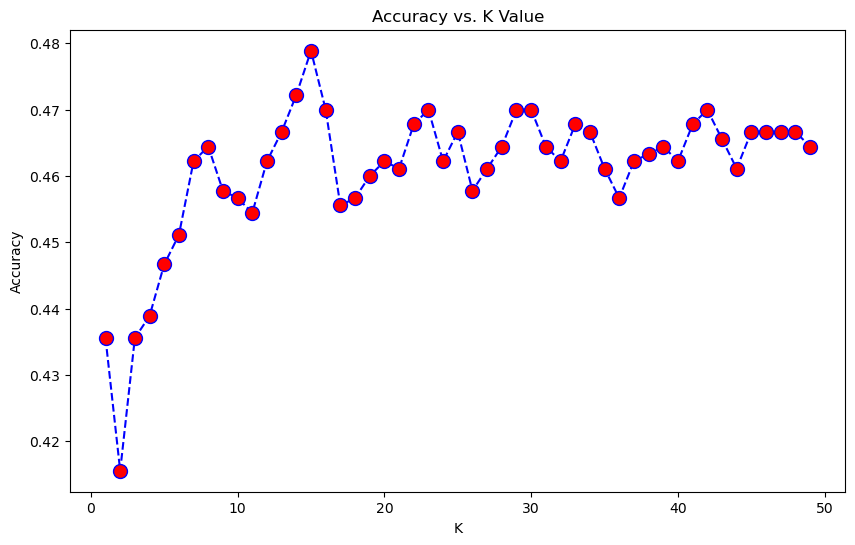

In [38]:
# 2nd method
accuracy=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    accuracy.append(accuracy_score(y_test,knn.predict(x_test)))
plt.figure(figsize=(10,6))
plt.plot(range(1,50),accuracy,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)    
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Accuarcy:-",min(accuracy),"at K =",accuracy.index(min(accuracy)))

# 6 moods KNN

In [39]:
data=pd.read_csv('6 moodsKNN.csv')
data.head()

,Heart Rate,Pulse Rate,Temperature,Skin Senstivity,Result
0,69.0,64.0,96.5,1.0,Sad
1,77.0,63.0,97.6,1.4,Sad
2,70.0,83.0,NaN,0.9,Neutral
3,80.0,78.0,97.7,1.3,Sad
4,100.0,89.0,98.9,2.5,Anger


In [40]:
data.isnull().sum()

Heart Rate         4
Pulse Rate         5
Temperature        5
Skin Senstivity    6
Result             0
dtype: int64

In [41]:
data['Heart Rate'].fillna(data['Heart Rate'].mean(),inplace=True)
data['Pulse Rate'].fillna(data['Pulse Rate'].mean(),inplace=True)
data['Temperature'].fillna(data['Temperature'].mean(),inplace=True)
data['Skin Senstivity'].fillna(data['Skin Senstivity'].mean(),inplace=True)
data.isnull().sum()

Heart Rate         0
Pulse Rate         0
Temperature        0
Skin Senstivity    0
Result             0
dtype: int64

In [42]:
x=data.iloc[:,0:4]
print(x.head())

print(x)

   Heart Rate  Pulse Rate  Temperature  Skin Senstivity
0        69.0        64.0    96.500000              1.0
1        77.0        63.0    97.600000              1.4
2        70.0        83.0    98.289145              0.9
3        80.0        78.0    97.700000              1.3
4       100.0        89.0    98.900000              2.5
      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
0           69.0        64.0    96.500000              1.0
1           77.0        63.0    97.600000              1.4
2           70.0        83.0    98.289145              0.9
3           80.0        78.0    97.700000              1.3
4          100.0        89.0    98.900000              2.5
...          ...         ...          ...              ...
2994        93.0        85.0    99.400000              1.1
2995        99.0        60.0    99.200000              0.9
2996        78.0        75.0    98.300000              2.0
2997        82.0        85.0    98.800000              0.9
2998        88.

In [43]:
# train test split 
y=data.iloc[:,-1]
print(y)
print(y.head())
print(y.shape)

0           Sad
1           Sad
2       Neutral
3           Sad
4         Anger
         ...   
2994      Happy
2995      Happy
2996     Stress
2997      Happy
2998      Anger
Name: Result, Length: 2999, dtype: object
0        Sad
1        Sad
2    Neutral
3        Sad
4      Anger
Name: Result, dtype: object
(2999,)


In [44]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [45]:
print(x_train)
print(x_train.shape)

      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
1139        83.0        71.0         99.4              0.4
606         93.0        96.0         98.0              3.7
2549        91.0        76.0         99.1              1.0
1161        90.0        95.0         99.1              3.5
1003        75.0        98.0         97.3              2.0
...          ...         ...          ...              ...
2514        94.0        94.0         98.1              4.0
2347        61.0        61.0         98.6              0.9
1608        98.0        70.0         97.9              0.7
2541        77.0        98.0         97.8              2.2
2575        70.0        82.0         97.9              1.0

[2099 rows x 4 columns]
(2099, 4)


In [46]:
print(x_test)
print(x_test.shape)

      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
1706        63.0        67.0         97.0              1.8
401         75.0        78.0         97.8              0.3
1748        91.0        84.0         98.2              0.8
1674        86.0        99.0         99.3              3.2
914         75.0        89.0         97.5              2.6
...          ...         ...          ...              ...
1930        63.0        66.0         98.6              0.6
1766        92.0        99.0         98.7              3.1
547         96.0        97.0         98.0              2.0
2365        68.0        70.0         97.0              1.3
2112        74.0        85.0         98.3              2.4

[900 rows x 4 columns]
(900, 4)


In [47]:
print(y_train)
print(y_train.shape)

1139      Happy
606       Anger
2549      Happy
1161    Neutral
1003       Fear
         ...   
2514      Anger
2347    Neutral
1608      Happy
2541     Stress
2575    Neutral
Name: Result, Length: 2099, dtype: object
(2099,)


In [48]:
print(y_test)
print(y_test.shape)

1706        Sad
401     Neutral
1748      Happy
1674      Anger
914        Fear
         ...   
1930    Neutral
1766      Anger
547        Fear
2365        Sad
2112        Sad
Name: Result, Length: 900, dtype: object
(900,)


# KNN

In [49]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import StandardScaler imports the StandardScaler class from scikit-learn's preprocessing module. The StandardScaler is a popular method for standardizing features by removing the mean and scaling to unit variance.
scaler=StandardScaler()


In [50]:
x_train=scaler.fit_transform(x_train)
x_train

array([[ 0.28418834, -0.90717525,  1.54315764, -1.26075028],
       [ 1.17312567,  1.24490878, -0.42193988,  1.36600895],
       [ 0.9953382 , -0.47675844,  1.12206531, -0.78315769],
       ...,
       [ 1.61759433, -0.99325861, -0.56230399, -1.02195398],
       [-0.24917406,  1.41707551, -0.7026681 ,  0.17202748],
       [-0.87143019,  0.03974173, -0.56230399, -0.78315769]])

In [51]:
x_test=scaler.fit_transform(x_test)
x_test

array([[-1.42458854, -1.24878942, -1.7339782 , -0.1742422 ],
       [-0.367441  , -0.29356254, -0.63515039, -1.36405993],
       [ 1.04208905,  0.2274703 , -0.08573648, -0.96745402],
       ...,
       [ 1.4825672 ,  1.3563748 , -0.36044344, -0.01559983],
       [-0.9841104 , -0.988273  , -1.7339782 , -0.57084811],
       [-0.45553663,  0.31430911,  0.05161699,  0.3016849 ]])

In [52]:
# values of  k 
# Ist method - sqrt of rows present in x_train 
np.sqrt(x_train.shape[0])
# The value of k determines how many neighboring data points are considered when classifying a new data point in k-nearest neighbors algorithm.

45.81484475582123

In [53]:
k=46

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats 
knn=KNeighborsClassifier(n_neighbors=k)

In [55]:
# train the model
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=46)

In [56]:
y_pred=knn.predict(x_test)
print(y_pred)



['Sad' 'Neutral' 'Happy' 'Anger' 'Fear' 'Stress' 'Anger' 'Anger' 'Neutral'
 'Fear' 'Fear' 'Neutral' 'Anger' 'Stress' 'Sad' 'Stress' 'Stress' 'Anger'
 'Sad' 'Neutral' 'Sad' 'Happy' 'Neutral' 'Anger' 'Anger' 'Fear' 'Happy'
 'Anger' 'Stress' 'Anger' 'Neutral' 'Fear' 'Happy' 'Anger' 'Stress'
 'Stress' 'Happy' 'Neutral' 'Sad' 'Fear' 'Neutral' 'Fear' 'Fear' 'Anger'
 'Neutral' 'Anger' 'Happy' 'Fear' 'Fear' 'Sad' 'Neutral' 'Sad' 'Stress'
 'Neutral' 'Sad' 'Sad' 'Anger' 'Stress' 'Fear' 'Sad' 'Stress' 'Stress'
 'Happy' 'Sad' 'Anger' 'Anger' 'Neutral' 'Neutral' 'Fear' 'Neutral'
 'Neutral' 'Sad' 'Sad' 'Anger' 'Sad' 'Anger' 'Anger' 'Fear' 'Happy'
 'Stress' 'Neutral' 'Neutral' 'Anger' 'Stress' 'Neutral' 'Happy' 'Neutral'
 'Fear' 'Anger' 'Neutral' 'Anger' 'Fear' 'Stress' 'Sad' 'Stress' 'Fear'
 'Happy' 'Fear' 'Stress' 'Sad' 'Fear' 'Anger' 'Neutral' 'Stress' 'Sad'
 'Anger' 'Neutral' 'Happy' 'Sad' 'Anger' 'Stress' 'Stress' 'Fear'
 'Neutral' 'Neutral' 'Fear' 'Neutral' 'Anger' 'Neutral' 'Sad' 'Stress'
 'Ha

In [57]:
print(y_pred.shape)
print(y_test.shape)


(900,)
(900,)


In [58]:
# compare y_pred and y_shape to check how accurate algorithm is 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7966666666666666

In [59]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test,y_pred)

array([[111,  13,   1,   4,   0,   3],
       [ 23,  90,   3,   0,  14,   8],
       [  0,   0, 106,   8,   0,   0],
       [ 46,   4,   5, 191,   0,   3],
       [  0,   6,   0,  20, 112,   1],
       [  9,   7,   0,   2,   3, 107]], dtype=int64)

Accuarcy:- 0.7544444444444445 at K = 0


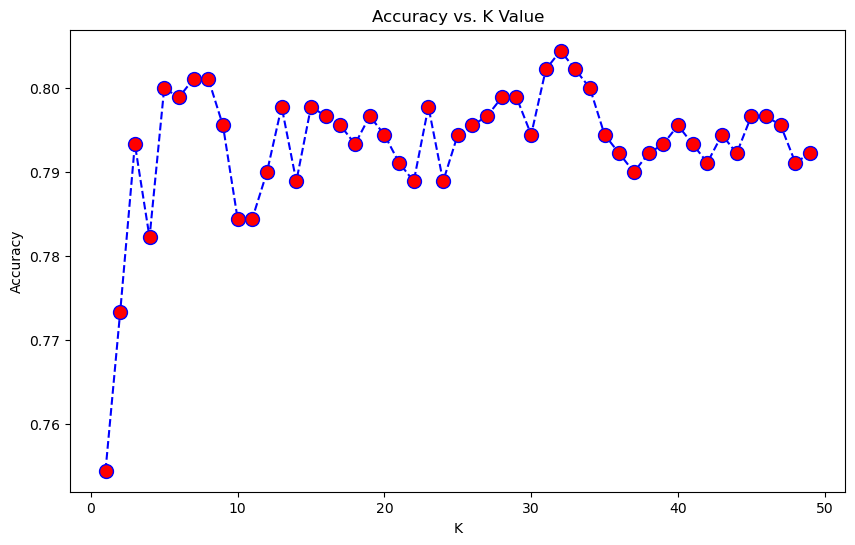

In [60]:
# 2nd method
accuracy=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    accuracy.append(accuracy_score(y_test,knn.predict(x_test)))
plt.figure(figsize=(10,6))
plt.plot(range(1,50),accuracy,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)    
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Accuarcy:-",min(accuracy),"at K =",accuracy.index(min(accuracy)))

# 6 Moods LSTM



In [61]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [63]:
data=pd.read_csv('6 moodsKNN.csv')
data.head()
data.isnull().sum()
data['Heart Rate'].fillna(data['Heart Rate'].mean(),inplace=True)
data['Pulse Rate'].fillna(data['Pulse Rate'].mean(),inplace=True)
data['Temperature'].fillna(data['Temperature'].mean(),inplace=True)
data['Skin Senstivity'].fillna(data['Skin Senstivity'].mean(),inplace=True)
data.isnull().sum()
x=data.iloc[:,0:4]
print(x.head())




print(x)


   Heart Rate  Pulse Rate  Temperature  Skin Senstivity
0        69.0        64.0    96.500000              1.0
1        77.0        63.0    97.600000              1.4
2        70.0        83.0    98.289145              0.9
3        80.0        78.0    97.700000              1.3
4       100.0        89.0    98.900000              2.5
      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
0           69.0        64.0    96.500000              1.0
1           77.0        63.0    97.600000              1.4
2           70.0        83.0    98.289145              0.9
3           80.0        78.0    97.700000              1.3
4          100.0        89.0    98.900000              2.5
...          ...         ...          ...              ...
2994        93.0        85.0    99.400000              1.1
2995        99.0        60.0    99.200000              0.9
2996        78.0        75.0    98.300000              2.0
2997        82.0        85.0    98.800000              0.9
2998        88.

In [64]:

# train test split 
y=data.iloc[:,-1]
print(y)
print(y.head())
print(y.shape)



0           Sad
1           Sad
2       Neutral
3           Sad
4         Anger
         ...   
2994      Happy
2995      Happy
2996     Stress
2997      Happy
2998      Anger
Name: Result, Length: 2999, dtype: object
0        Sad
1        Sad
2    Neutral
3        Sad
4      Anger
Name: Result, dtype: object
(2999,)


In [65]:

# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [66]:
print(x_train)
print(x_train.shape)

      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
1139        83.0        71.0         99.4              0.4
606         93.0        96.0         98.0              3.7
2549        91.0        76.0         99.1              1.0
1161        90.0        95.0         99.1              3.5
1003        75.0        98.0         97.3              2.0
...          ...         ...          ...              ...
2514        94.0        94.0         98.1              4.0
2347        61.0        61.0         98.6              0.9
1608        98.0        70.0         97.9              0.7
2541        77.0        98.0         97.8              2.2
2575        70.0        82.0         97.9              1.0

[2099 rows x 4 columns]
(2099, 4)


In [67]:
print(x_test)
print(x_test.shape)

      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
1706        63.0        67.0         97.0              1.8
401         75.0        78.0         97.8              0.3
1748        91.0        84.0         98.2              0.8
1674        86.0        99.0         99.3              3.2
914         75.0        89.0         97.5              2.6
...          ...         ...          ...              ...
1930        63.0        66.0         98.6              0.6
1766        92.0        99.0         98.7              3.1
547         96.0        97.0         98.0              2.0
2365        68.0        70.0         97.0              1.3
2112        74.0        85.0         98.3              2.4

[900 rows x 4 columns]
(900, 4)


In [68]:
print(y_train)
print(y_train.shape)

1139      Happy
606       Anger
2549      Happy
1161    Neutral
1003       Fear
         ...   
2514      Anger
2347    Neutral
1608      Happy
2541     Stress
2575    Neutral
Name: Result, Length: 2099, dtype: object
(2099,)


In [69]:
print(y_test)
print(y_test.shape)


1706        Sad
401     Neutral
1748      Happy
1674      Anger
914        Fear
         ...   
1930    Neutral
1766      Anger
547        Fear
2365        Sad
2112        Sad
Name: Result, Length: 900, dtype: object
(900,)


In [70]:
pip install MedPy


Note: you may need to restart the kernel to use updated packages.


In [71]:
# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ['Heart Rate','Pulse Rate','Temperature', 'Skin Senstivity']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [72]:
# Encode categorical variable 'Result'
label_encoder = LabelEncoder()
data['Result'] = label_encoder.fit_transform(data['Result'])


In [73]:
# Split the data into features and target variable
x = data[numerical_cols].values
y = data['Result'].values

In [74]:
#rics=['accuracy'])

In [75]:
time_steps = 1
x_reshaped = x.reshape((x.shape[0], time_steps, x.shape[1]))
x_train, x_test, y_train, y_test = train_test_split(x_reshaped, y, test_size=0.3, random_state=2)


In [76]:
#  Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))


In [77]:
#  Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [78]:
# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/50


33/33 [==============================] - 3s 23ms/step - loss: 0.4792 - accuracy: 0.1753 - val_loss: 0.2270 - val_accuracy: 0.1967
Epoch 2/50
33/33 [==============================] - 0s 6ms/step - loss: -0.0084 - accuracy: 0.2001 - val_loss: -0.3753 - val_accuracy: 0.2156
Epoch 3/50
33/33 [==============================] - 0s 5ms/step - loss: -0.7040 - accuracy: 0.2039 - val_loss: -1.2630 - val_accuracy: 0.2167
Epoch 4/50
33/33 [==============================] - 0s 7ms/step - loss: -1.6992 - accuracy: 0.2063 - val_loss: -2.4942 - val_accuracy: 0.2178
Epoch 5/50
33/33 [==============================] - 0s 5ms/step - loss: -3.0351 - accuracy: 0.1991 - val_loss: -4.0746 - val_accuracy: 0.2111
Epoch 6/50
33/33 [==============================] - 0s 5ms/step - loss: -4.7220 - accuracy: 0.1963 - val_loss: -5.9816 - val_accuracy: 0.2067
Epoch 7/50
33/33 [==============================] - 0s 6ms/step - loss: -6.6665 - accuracy: 0.1915 - val_loss: -8.2321 - val_accuracy: 0.2011
Epoch

In [79]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

29/29 [==============================] - 0s 2ms/step - loss: -135.1010 - accuracy: 0.1533
Test Accuracy: 15.33%


# 6 moods Decision Tree



In [80]:
data=pd.read_csv('6 moodsKNN.csv')
data.head()
data.isnull().sum()
data['Heart Rate'].fillna(data['Heart Rate'].mean(),inplace=True)
data['Pulse Rate'].fillna(data['Pulse Rate'].mean(),inplace=True)
data['Temperature'].fillna(data['Temperature'].mean(),inplace=True)
data['Skin Senstivity'].fillna(data['Skin Senstivity'].mean(),inplace=True)
data.isnull().sum()
x=data.iloc[:,0:4]
print(x.head())




print(x)

   Heart Rate  Pulse Rate  Temperature  Skin Senstivity
0        69.0        64.0    96.500000              1.0
1        77.0        63.0    97.600000              1.4
2        70.0        83.0    98.289145              0.9
3        80.0        78.0    97.700000              1.3
4       100.0        89.0    98.900000              2.5
      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
0           69.0        64.0    96.500000              1.0
1           77.0        63.0    97.600000              1.4
2           70.0        83.0    98.289145              0.9
3           80.0        78.0    97.700000              1.3
4          100.0        89.0    98.900000              2.5
...          ...         ...          ...              ...
2994        93.0        85.0    99.400000              1.1
2995        99.0        60.0    99.200000              0.9
2996        78.0        75.0    98.300000              2.0
2997        82.0        85.0    98.800000              0.9
2998        88.

In [81]:
print(x_train)
print(x_train.shape)

# train test split 
y=data.iloc[:,-1]
print(y)
print(y.head())
print(y.shape)



[[[ 0.30013365 -0.90543801  1.54851426 -1.2678574 ]]

 [[ 1.1863609   1.2522199  -0.40306347  1.35591966]]

 [[ 1.00911545 -0.47390643  1.13031904 -0.79080703]]

 ...

 [[ 1.62947452 -0.99174432 -0.54246188 -1.02933222]]

 [[-0.23160269  1.42483253 -0.68186029  0.16329372]]

 [[-0.85196176  0.04393147 -0.54246188 -0.79080703]]]
(2099, 1, 4)
0           Sad
1           Sad
2       Neutral
3           Sad
4         Anger
         ...   
2994      Happy
2995      Happy
2996     Stress
2997      Happy
2998      Anger
Name: Result, Length: 2999, dtype: object
0        Sad
1        Sad
2    Neutral
3        Sad
4      Anger
Name: Result, dtype: object
(2999,)


In [82]:

# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [83]:
print(x_test)
print(x_test.shape)

      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
1706        63.0        67.0         97.0              1.8
401         75.0        78.0         97.8              0.3
1748        91.0        84.0         98.2              0.8
1674        86.0        99.0         99.3              3.2
914         75.0        89.0         97.5              2.6
...          ...         ...          ...              ...
1930        63.0        66.0         98.6              0.6
1766        92.0        99.0         98.7              3.1
547         96.0        97.0         98.0              2.0
2365        68.0        70.0         97.0              1.3
2112        74.0        85.0         98.3              2.4

[900 rows x 4 columns]
(900, 4)


In [84]:
print(x_train)
print(x_train.shape)

      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
1139        83.0        71.0         99.4              0.4
606         93.0        96.0         98.0              3.7
2549        91.0        76.0         99.1              1.0
1161        90.0        95.0         99.1              3.5
1003        75.0        98.0         97.3              2.0
...          ...         ...          ...              ...
2514        94.0        94.0         98.1              4.0
2347        61.0        61.0         98.6              0.9
1608        98.0        70.0         97.9              0.7
2541        77.0        98.0         97.8              2.2
2575        70.0        82.0         97.9              1.0

[2099 rows x 4 columns]
(2099, 4)


In [85]:
print(y_test)
print(y_test.shape)

1706        Sad
401     Neutral
1748      Happy
1674      Anger
914        Fear
         ...   
1930    Neutral
1766      Anger
547        Fear
2365        Sad
2112        Sad
Name: Result, Length: 900, dtype: object
(900,)


In [86]:
print(y_train)
print(y_train.shape)

1139      Happy
606       Anger
2549      Happy
1161    Neutral
1003       Fear
         ...   
2514      Anger
2347    Neutral
1608      Happy
2541     Stress
2575    Neutral
Name: Result, Length: 2099, dtype: object
(2099,)


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



In [88]:

clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(x_train, y_train)

# Predict the labels for test set
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8011111111111111


In [89]:

# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [90]:
data=pd.read_csv('6 moodsKNN.csv')
data.head()
data.isnull().sum()
data['Heart Rate'].fillna(data['Heart Rate'].mean(),inplace=True)
data['Pulse Rate'].fillna(data['Pulse Rate'].mean(),inplace=True)
data['Temperature'].fillna(data['Temperature'].mean(),inplace=True)
data['Skin Senstivity'].fillna(data['Skin Senstivity'].mean(),inplace=True)
data.isnull().sum()
x=data.iloc[:,0:4]
print(x.head())

print(x)

   Heart Rate  Pulse Rate  Temperature  Skin Senstivity
0        69.0        64.0    96.500000              1.0
1        77.0        63.0    97.600000              1.4
2        70.0        83.0    98.289145              0.9
3        80.0        78.0    97.700000              1.3
4       100.0        89.0    98.900000              2.5
      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
0           69.0        64.0    96.500000              1.0
1           77.0        63.0    97.600000              1.4
2           70.0        83.0    98.289145              0.9
3           80.0        78.0    97.700000              1.3
4          100.0        89.0    98.900000              2.5
...          ...         ...          ...              ...
2994        93.0        85.0    99.400000              1.1
2995        99.0        60.0    99.200000              0.9
2996        78.0        75.0    98.300000              2.0
2997        82.0        85.0    98.800000              0.9
2998        88.

In [91]:
print(x_train)
print(x_train.shape)

# train test split 
y=data.iloc[:,-1]
print(y)
print(y.head())
print(y.shape)


      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
1139        83.0        71.0         99.4              0.4
606         93.0        96.0         98.0              3.7
2549        91.0        76.0         99.1              1.0
1161        90.0        95.0         99.1              3.5
1003        75.0        98.0         97.3              2.0
...          ...         ...          ...              ...
2514        94.0        94.0         98.1              4.0
2347        61.0        61.0         98.6              0.9
1608        98.0        70.0         97.9              0.7
2541        77.0        98.0         97.8              2.2
2575        70.0        82.0         97.9              1.0

[2099 rows x 4 columns]
(2099, 4)
0           Sad
1           Sad
2       Neutral
3           Sad
4         Anger
         ...   
2994      Happy
2995      Happy
2996     Stress
2997      Happy
2998      Anger
Name: Result, Length: 2999, dtype: object
0        Sad
1        Sad
2    Neutral


In [92]:

# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [93]:
print(x_test)
print(x_test.shape)

      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
1706        63.0        67.0         97.0              1.8
401         75.0        78.0         97.8              0.3
1748        91.0        84.0         98.2              0.8
1674        86.0        99.0         99.3              3.2
914         75.0        89.0         97.5              2.6
...          ...         ...          ...              ...
1930        63.0        66.0         98.6              0.6
1766        92.0        99.0         98.7              3.1
547         96.0        97.0         98.0              2.0
2365        68.0        70.0         97.0              1.3
2112        74.0        85.0         98.3              2.4

[900 rows x 4 columns]
(900, 4)


In [94]:
print(x_train)
print(x_train.shape)

      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
1139        83.0        71.0         99.4              0.4
606         93.0        96.0         98.0              3.7
2549        91.0        76.0         99.1              1.0
1161        90.0        95.0         99.1              3.5
1003        75.0        98.0         97.3              2.0
...          ...         ...          ...              ...
2514        94.0        94.0         98.1              4.0
2347        61.0        61.0         98.6              0.9
1608        98.0        70.0         97.9              0.7
2541        77.0        98.0         97.8              2.2
2575        70.0        82.0         97.9              1.0

[2099 rows x 4 columns]
(2099, 4)


In [95]:
print(y_train)
print(y_train.shape)

1139      Happy
606       Anger
2549      Happy
1161    Neutral
1003       Fear
         ...   
2514      Anger
2347    Neutral
1608      Happy
2541     Stress
2575    Neutral
Name: Result, Length: 2099, dtype: object
(2099,)


In [96]:
print(y_test)
print(y_test.shape)

1706        Sad
401     Neutral
1748      Happy
1674      Anger
914        Fear
         ...   
1930    Neutral
1766      Anger
547        Fear
2365        Sad
2112        Sad
Name: Result, Length: 900, dtype: object
(900,)


In [97]:

# Initialize Gradient Boosting Classifier
gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbdt.fit(x_train, y_train)

# Make predictions
y_pred = gbdt.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8333333333333334


# 6 Moods of CNN

In [98]:
data=pd.read_csv('6 moodsKNN.csv')
data.head()
data.isnull().sum()
data['Heart Rate'].fillna(data['Heart Rate'].mean(),inplace=True)
data['Pulse Rate'].fillna(data['Pulse Rate'].mean(),inplace=True)
data['Temperature'].fillna(data['Temperature'].mean(),inplace=True)
data['Skin Senstivity'].fillna(data['Skin Senstivity'].mean(),inplace=True)
data.isnull().sum()
x=data.iloc[:,0:4]
print(x.head())




print(x)

   Heart Rate  Pulse Rate  Temperature  Skin Senstivity
0        69.0        64.0    96.500000              1.0
1        77.0        63.0    97.600000              1.4
2        70.0        83.0    98.289145              0.9
3        80.0        78.0    97.700000              1.3
4       100.0        89.0    98.900000              2.5
      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
0           69.0        64.0    96.500000              1.0
1           77.0        63.0    97.600000              1.4
2           70.0        83.0    98.289145              0.9
3           80.0        78.0    97.700000              1.3
4          100.0        89.0    98.900000              2.5
...          ...         ...          ...              ...
2994        93.0        85.0    99.400000              1.1
2995        99.0        60.0    99.200000              0.9
2996        78.0        75.0    98.300000              2.0
2997        82.0        85.0    98.800000              0.9
2998        88.

In [99]:
print(x_train)
print(x_train.shape)

# train test split 
y=data.iloc[:,-1]
print(y)
print(y.head())
print(y.shape)



      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
1139        83.0        71.0         99.4              0.4
606         93.0        96.0         98.0              3.7
2549        91.0        76.0         99.1              1.0
1161        90.0        95.0         99.1              3.5
1003        75.0        98.0         97.3              2.0
...          ...         ...          ...              ...
2514        94.0        94.0         98.1              4.0
2347        61.0        61.0         98.6              0.9
1608        98.0        70.0         97.9              0.7
2541        77.0        98.0         97.8              2.2
2575        70.0        82.0         97.9              1.0

[2099 rows x 4 columns]
(2099, 4)
0           Sad
1           Sad
2       Neutral
3           Sad
4         Anger
         ...   
2994      Happy
2995      Happy
2996     Stress
2997      Happy
2998      Anger
Name: Result, Length: 2999, dtype: object
0        Sad
1        Sad
2    Neutral


In [100]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [101]:
print(x_test)
print(x_test.shape)

      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
1706        63.0        67.0         97.0              1.8
401         75.0        78.0         97.8              0.3
1748        91.0        84.0         98.2              0.8
1674        86.0        99.0         99.3              3.2
914         75.0        89.0         97.5              2.6
...          ...         ...          ...              ...
1930        63.0        66.0         98.6              0.6
1766        92.0        99.0         98.7              3.1
547         96.0        97.0         98.0              2.0
2365        68.0        70.0         97.0              1.3
2112        74.0        85.0         98.3              2.4

[900 rows x 4 columns]
(900, 4)


In [102]:
print(x_train)
print(x_train.shape)

      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
1139        83.0        71.0         99.4              0.4
606         93.0        96.0         98.0              3.7
2549        91.0        76.0         99.1              1.0
1161        90.0        95.0         99.1              3.5
1003        75.0        98.0         97.3              2.0
...          ...         ...          ...              ...
2514        94.0        94.0         98.1              4.0
2347        61.0        61.0         98.6              0.9
1608        98.0        70.0         97.9              0.7
2541        77.0        98.0         97.8              2.2
2575        70.0        82.0         97.9              1.0

[2099 rows x 4 columns]
(2099, 4)


In [103]:
print(y_train)
print(y_train.shape)

1139      Happy
606       Anger
2549      Happy
1161    Neutral
1003       Fear
         ...   
2514      Anger
2347    Neutral
1608      Happy
2541     Stress
2575    Neutral
Name: Result, Length: 2099, dtype: object
(2099,)


In [104]:
print(y_test)
print(y_test.shape)

1706        Sad
401     Neutral
1748      Happy
1674      Anger
914        Fear
         ...   
1930    Neutral
1766      Anger
547        Fear
2365        Sad
2112        Sad
Name: Result, Length: 900, dtype: object
(900,)


In [105]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical 


# Reshape data for CNN
x_train = np.array(x_train).reshape(-1, 1, 4, 1)
x_test = np.array(x_test).reshape(-1, 1, 4, 1)



In [106]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout


In [107]:
data['Result'] = data['Result'].astype(str)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Result'])
X = tokenizer.texts_to_sequences(data['Result'])
maxlen = 100  # Example maximum sequence length
X = pad_sequences(X, maxlen=maxlen)

In [108]:


# Define the CNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=X.shape[1]))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [109]:

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [110]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10


ValueError: in user code:

    File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\HP\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 100), found shape=(None, 1, 4, 1)


# 6 moods of Scikit learn 


In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.utils import to_categorical

In [ ]:
data=pd.read_csv('6 moodsKNN.csv')
data.head()
data.isnull().sum()
data['Heart Rate'].fillna(data['Heart Rate'].mean(),inplace=True)
data['Pulse Rate'].fillna(data['Pulse Rate'].mean(),inplace=True)
data['Temperature'].fillna(data['Temperature'].mean(),inplace=True)
data['Skin Senstivity'].fillna(data['Skin Senstivity'].mean(),inplace=True)
data.isnull().sum()
x=data.iloc[:,0:4]
print(x.head())


In [ ]:

# train test split 
y=data.iloc[:,-1]
print(y)
print(y.head())
print(y.shape)


In [ ]:

# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [ ]:
print(x_test)
print(x_test.shape)

In [ ]:
print(x_train)
print(x_train.shape)

In [ ]:
print(y_train)
print(y_train.shape)

In [ ]:
print(y_test)
print(y_test.shape)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

#  Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:

from sklearn.ensemble import RandomForestClassifier# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(random_state=2)
clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 10 Moods of LSTM


In [ ]:
pip install tensorflow

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
data=pd.read_csv('mood of child.csv')
data.head()
data.isnull().sum()
data['Heart Rate'].fillna(data['Heart Rate'].mean(),inplace=True)
data['Pulse Rate'].fillna(data['Pulse Rate'].mean(),inplace=True)
data['Temperature'].fillna(data['Temperature'].mean(),inplace=True)
data['Skin Senstivity'].fillna(data['Skin Senstivity'].mean(),inplace=True)
data.isnull().sum()
x=data.iloc[:,0:4]
print(x.head())




print(x)

In [ ]:

# train test split 
y=data.iloc[:,-1]
print(y)
print(y.head())
print(y.shape)


In [ ]:

# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [ ]:
print(x_train)
print(x_train.shape)

In [ ]:
print(x_test)
print(x_test.shape)

In [ ]:
print(y_test)
print(y_test.shape)

In [ ]:
print(y_train)
print(y_train.shape)

In [ ]:
pip install MedPy

In [ ]:
# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ['Heart Rate','Pulse Rate','Temperature', 'Skin Senstivity']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [ ]:
# Encode categorical variable 'Result'
label_encoder = LabelEncoder()
data['Result'] = label_encoder.fit_transform(data['Result'])

In [ ]:
# Split the data into features and target variable
x = data[numerical_cols].values
y = data['Result'].values

In [ ]:
time_steps = 1
x_reshaped = x.reshape((x.shape[0], time_steps, x.shape[1]))
x_train, x_test, y_train, y_test = train_test_split(x_reshaped, y, test_size=0.3, random_state=2)

In [ ]:
#  Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
#  Compile the model


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model

model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))



In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# 10 moods of Decision Tree




In [ ]:
data=pd.read_csv('mood of child.csv')
data.head()
data.isnull().sum()
data['Heart Rate'].fillna(data['Heart Rate'].mean(),inplace=True)
data['Pulse Rate'].fillna(data['Pulse Rate'].mean(),inplace=True)
data['Temperature'].fillna(data['Temperature'].mean(),inplace=True)
data['Skin Senstivity'].fillna(data['Skin Senstivity'].mean(),inplace=True)
data.isnull().sum()
x=data.iloc[:,0:4]
print(x.head())




print(x)

In [ ]:
print(x_train)
print(x_train.shape)

# train test split 
y=data.iloc[:,-1]
print(y)
print(y.head())
print(y.shape)


In [ ]:

# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [ ]:
print(x_test)
print(x_test.shape)

In [ ]:
print(x_train)
print(x_train.shape)

In [ ]:
print(y_train)
print(y_train.shape)

In [ ]:
print(y_test)
print(y_test.shape)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [ ]:

clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(x_train, y_train)

# Predict the labels for test set
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:

# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
data=pd.read_csv('mood of child.csv')
data.head()
data.isnull().sum()
data['Heart Rate'].fillna(data['Heart Rate'].mean(),inplace=True)
data['Pulse Rate'].fillna(data['Pulse Rate'].mean(),inplace=True)
data['Temperature'].fillna(data['Temperature'].mean(),inplace=True)
data['Skin Senstivity'].fillna(data['Skin Senstivity'].mean(),inplace=True)
data.isnull().sum()
x=data.iloc[:,0:4]
print(x.head())




print(x)


In [ ]:
print(x_train)
print(x_train.shape)

# train test split 
y=data.iloc[:,-1]
print(y)
print(y.head())
print(y.shape)


In [ ]:

# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [ ]:
print(x_test)
print(x_test.shape)

In [ ]:
print(x_train)
print(x_train.shape)

In [ ]:
print(y_train)
print(y_train.shape)

In [ ]:
print(y_test)
print(y_test.shape)

In [ ]:
# Initialize Gradient Boosting Classifier
gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbdt.fit(x_train, y_train)

# Make predictions
y_pred = gbdt.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 10 moods of Scikit learn


In [ ]:
data=pd.read_csv('mood of child.csv')
data.head()
data.isnull().sum()
data['Heart Rate'].fillna(data['Heart Rate'].mean(),inplace=True)
data['Pulse Rate'].fillna(data['Pulse Rate'].mean(),inplace=True)
data['Temperature'].fillna(data['Temperature'].mean(),inplace=True)
data['Skin Senstivity'].fillna(data['Skin Senstivity'].mean(),inplace=True)
data.isnull().sum()
x=data.iloc[:,0:4]
print(x.head())




print(x)

In [ ]:
print(x_train)
print(x_train.shape)

# train test split 
y=data.iloc[:,-1]
print(y)
print(y.head())
print(y.shape)


In [ ]:

# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [ ]:
print(x_test)
print(x_test.shape)

In [ ]:
print(x_train)
print(x_train.shape)

In [ ]:
print(y_test)
print(y_test.shape)

In [ ]:
print(y_train)
print(y_train.shape)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.utils import to_categorical

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

#  Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:

from sklearn.ensemble import RandomForestClassifier# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(random_state=2)
clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test)


# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 8 moods of child 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
# for decision tree
import matplotlib.pyplot as mtp  
%matplotlib inline
# for linear regression
from sklearn.linear_model import LinearRegression
import seaborn as sns
# for SVM
from sklearn import svm, datasets
from sklearn.pipeline import make_pipeline
from  sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('8moods of child.csv')
data.head()

In [ ]:
data.isnull().sum()

In [ ]:
data['Heart Rate'].fillna(data['Heart Rate'].mean(),inplace=True)
data['Pulse Rate'].fillna(data['Pulse Rate'].mean(),inplace=True)
data['Temperature'].fillna(data['Temperature'].mean(),inplace=True)
data['Skin Senstivity'].fillna(data['Skin Senstivity'].mean(),inplace=True)
data.isnull().sum()

In [ ]:
x=data.iloc[:,0:4]
print(x.head())

print(x)

In [ ]:
# train test split 
y=data.iloc[:,-1]
print(y)
print(y.head())
print(y.shape)

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [ ]:
print(x_train)
print(x_train.shape)

In [ ]:
print(x_test)
print(x_test.shape)

In [ ]:
print(y_test)
print(y_test.shape)

In [ ]:
print(y_train)
print(y_train.shape)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [ ]:
x_train=scaler.fit_transform(x_train)
x_train

In [ ]:
x_test=scaler.fit_transform(x_test)
x_test

In [ ]:
# values of  k 
# Ist method - sqrt of rows present in x_train 
np.sqrt(x_train.shape[0])
k=45

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats 
knn=KNeighborsClassifier(n_neighbors=k)

In [ ]:
# train the model
knn.fit(x_train,y_train)


In [ ]:
y_pred=knn.predict(x_test)
print(y_pred)



In [ ]:
# compare y_pred and y_shape to check how accurate algorithm is 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test,y_pred)

In [ ]:
# 2nd method
accuracy=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    accuracy.append(accuracy_score(y_test,knn.predict(x_test)))
plt.figure(figsize=(10,6))
plt.plot(range(1,50),accuracy,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)    
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Accuarcy:-",min(accuracy),"at K =",accuracy.index(min(accuracy)))

# 8 Moods LSTM


In [ ]:
pip install tensorflow

In [ ]:
data=pd.read_csv('8moods of child.csv')
data.head()
data.isnull().sum()
data['Heart Rate'].fillna(data['Heart Rate'].mean(),inplace=True)
data['Pulse Rate'].fillna(data['Pulse Rate'].mean(),inplace=True)
data['Temperature'].fillna(data['Temperature'].mean(),inplace=True)
data['Skin Senstivity'].fillna(data['Skin Senstivity'].mean(),inplace=True)
data.isnull().sum()
x=data.iloc[:,0:4]
print(x.head())




print(x)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
# train test split 
y=data.iloc[:,-1]
print(y)
print(y.head())
print(y.shape)

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [ ]:
print(x_train)
print(x_train.shape)

In [ ]:
print(x_test)
print(x_test.shape)

In [ ]:
print(y_test)
print(y_test.shape)

In [ ]:
print(y_train)
print(y_train.shape)

In [ ]:
pip install MedPy

In [ ]:
# Normalize numerical features
scaler = StandardScaler()
numerical_cols = ['Heart Rate','Pulse Rate','Temperature', 'Skin Senstivity']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [ ]:
# Encode categorical variable 'Result'
label_encoder = LabelEncoder()
data['Result'] = label_encoder.fit_transform(data['Result'])

In [ ]:
# Split the data into features and target variable
x = data[numerical_cols].values
y = data['Result'].values

In [ ]:
time_steps = 1
x_reshaped = x.reshape((x.shape[0], time_steps, x.shape[1]))
x_train, x_test, y_train, y_test = train_test_split(x_reshaped, y, test_size=0.3, random_state=2)

In [ ]:
#  Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
#  Compile the model


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model

model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

# 8  Moods Decision tree


In [ ]:
data=pd.read_csv('8moods of child.csv')
data.head()
data.isnull().sum()
data['Heart Rate'].fillna(data['Heart Rate'].mean(),inplace=True)
data['Pulse Rate'].fillna(data['Pulse Rate'].mean(),inplace=True)
data['Temperature'].fillna(data['Temperature'].mean(),inplace=True)
data['Skin Senstivity'].fillna(data['Skin Senstivity'].mean(),inplace=True)
data.isnull().sum()
x=data.iloc[:,0:4]
print(x.head())




print(x)

In [ ]:
# train test split 
y=data.iloc[:,-1]
print(y)
print(y.head())
print(y.shape)

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [ ]:
print(x_train)
print(x_train.shape)

In [ ]:
print(x_test)
print(x_test.shape)

In [ ]:
print(x_train)
print(x_train.shape)

In [ ]:
print(y_test)
print(y_test.shape)

In [ ]:
print(y_train.shape)
print(y_train)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [ ]:

clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(x_train, y_train)

# Predict the labels for test set
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:

# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:

# Initialize Gradient Boosting Classifier
gbdt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbdt.fit(x_train, y_train)

# Make predictions
y_pred = gbdt.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 8 Moods of Scikit learn 


In [ ]:
data=pd.read_csv('8moods of child.csv')
data.head()
data.isnull().sum()
data['Heart Rate'].fillna(data['Heart Rate'].mean(),inplace=True)
data['Pulse Rate'].fillna(data['Pulse Rate'].mean(),inplace=True)
data['Temperature'].fillna(data['Temperature'].mean(),inplace=True)
data['Skin Senstivity'].fillna(data['Skin Senstivity'].mean(),inplace=True)
data.isnull().sum()
x=data.iloc[:,0:4]
print(x.head())




print(x)

In [ ]:
# train test split 
y=data.iloc[:,-1]
print(y)
print(y.head())
print(y.shape)

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [ ]:
print(x_train)
print(x_train.shape)

In [ ]:
print(x_test)
print(x_test.shape)

In [ ]:
print(y_test)
print(y_test.shape)

In [ ]:
print(y_train)
print(y_train.shape)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler

#  Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:

from sklearn.ensemble import RandomForestClassifier# Initialize and train the Random Forest classifier
clf = RandomForestClassifier(random_state=2)
clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# MLP 8 moods of child 

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
data=pd.read_csv('8moods of child.csv')
data.head()
data.isnull().sum()
data['Heart Rate'].fillna(data['Heart Rate'].mean(),inplace=True)
data['Pulse Rate'].fillna(data['Pulse Rate'].mean(),inplace=True)
data['Temperature'].fillna(data['Temperature'].mean(),inplace=True)
data['Skin Senstivity'].fillna(data['Skin Senstivity'].mean(),inplace=True)
data.isnull().sum()
x=data.iloc[:,0:4]
print(x.head())


print(x)

In [ ]:
# train test split 
y=data.iloc[:,-1]
print(y)
print(y.head())
print(y.shape)

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [ ]:
print(x_train)
print(x_train.shape)

In [ ]:
print(x_test)
print(x_test.shape)

In [111]:
print(y_test)
print(y_test.shape)

1706        Sad
401     Neutral
1748      Happy
1674      Anger
914        Fear
         ...   
1930    Neutral
1766      Anger
547        Fear
2365        Sad
2112        Sad
Name: Result, Length: 900, dtype: object
(900,)


print(y_train)
print(y_train.shape)

In [112]:
# Build and train MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=2)
mlp_model.fit(x_train, y_train)

# Evaluate model performance
y_pred = mlp_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of MLP model:", accuracy)

NameError: name 'MLPClassifier' is not defined

# MLP using 10 moods of child 


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [114]:
data=pd.read_csv('mood of child.csv')
data.head()
data.isnull().sum()
data['Heart Rate'].fillna(data['Heart Rate'].mean(),inplace=True)
data['Pulse Rate'].fillna(data['Pulse Rate'].mean(),inplace=True)
data['Temperature'].fillna(data['Temperature'].mean(),inplace=True)
data['Skin Senstivity'].fillna(data['Skin Senstivity'].mean(),inplace=True)
data.isnull().sum()
x=data.iloc[:,0:4]
print(x.head())


print(x)

   Heart Rate  Pulse Rate  Temperature  Skin Senstivity
0        70.0        86.0         98.0              3.2
1        60.0        85.0         96.9              0.9
2        80.0        84.0         98.7              1.8
3        67.0        74.0         98.9              3.0
4        64.0        79.0         96.8              2.3
      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
0           70.0        86.0         98.0              3.2
1           60.0        85.0         96.9              0.9
2           80.0        84.0         98.7              1.8
3           67.0        74.0         98.9              3.0
4           64.0        79.0         96.8              2.3
...          ...         ...          ...              ...
2994        73.0        87.0         98.6              1.9
2995        82.0        70.0         98.2              2.5
2996        71.0        71.0         97.5              3.0
2997        68.0        71.0         99.3              4.8
2998        60.

In [115]:
# train test split 
y=data.iloc[:,-1]
print(y)
print(y.head())
print(y.shape)

0             Fear
1              Sad
2            Shame
3            Shame
4             Fear
           ...    
2994         Guilt
2995       Excited
2996          Fear
2997    Depression
2998    Depression
Name: Result, Length: 2999, dtype: object
0     Fear
1      Sad
2    Shame
3    Shame
4     Fear
Name: Result, dtype: object
(2999,)


In [116]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [117]:
print(x_train)
print(x_train.shape)

      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
1139        69.0        99.0         98.5          4.10000
606         81.0        86.0         99.3          4.30000
2549        61.0        76.0         97.9          0.70000
1161        83.0        95.0         99.1          5.00000
1003        65.0        67.0         98.3          0.60000
...          ...         ...          ...              ...
2514        63.0        89.0         98.7          2.26613
2347        66.0        84.0         97.7          2.26613
1608        86.0        79.0         98.1          3.90000
2541        65.0        79.0         97.6          1.90000
2575        83.0       106.0         98.7          3.00000

[2099 rows x 4 columns]
(2099, 4)


In [118]:
print(x_test)
print(x_test.shape)

      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
1706        82.0        87.0         98.7              2.3
401         75.0        60.0         98.5              0.6
1748        72.0        99.0         98.7              3.3
1674        76.0        61.0         96.4              1.2
914         77.0        74.0         98.3              1.2
...          ...         ...          ...              ...
1930        84.0        80.0         99.7              3.7
1766        86.0        93.0         99.4              3.3
547         89.0        76.0         98.8              3.4
2365        71.0        61.0         99.4              2.3
2112        71.0        73.0         96.8              1.7

[900 rows x 4 columns]
(900, 4)


In [119]:
print(y_test)
print(y_test.shape)

1706    Excited
401     Neutral
1748      Shame
1674        Sad
914       Happy
         ...   
1930      Anger
1766    Excited
547     Excited
2365      Happy
2112        Sad
Name: Result, Length: 900, dtype: object
(900,)


In [120]:
print(y_train)
print(y_train.shape)

1139    Depression
606        Excited
2549       Neutral
1161         Anger
1003         Happy
           ...    
2514         Happy
2347           Sad
1608         Anger
2541         Guilt
2575       Excited
Name: Result, Length: 2099, dtype: object
(2099,)


In [121]:
# Build and train MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=2)
mlp_model.fit(x_train, y_train)

# Evaluate model performance
y_pred = mlp_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of MLP model:", accuracy)

Accuracy of MLP model: 0.38


# MLP using 6 moods of child 
Multilayer Perceptron

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
data=pd.read_csv('6 moodsKNN.csv')
data.head()
data.isnull().sum()
data['Heart Rate'].fillna(data['Heart Rate'].mean(),inplace=True)
data['Pulse Rate'].fillna(data['Pulse Rate'].mean(),inplace=True)
data['Temperature'].fillna(data['Temperature'].mean(),inplace=True)
data['Skin Senstivity'].fillna(data['Skin Senstivity'].mean(),inplace=True)
data.isnull().sum()
x=data.iloc[:,0:4]
print(x.head())


print(x)

   Heart Rate  Pulse Rate  Temperature  Skin Senstivity
0        69.0        64.0    96.500000              1.0
1        77.0        63.0    97.600000              1.4
2        70.0        83.0    98.289145              0.9
3        80.0        78.0    97.700000              1.3
4       100.0        89.0    98.900000              2.5
      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
0           69.0        64.0    96.500000              1.0
1           77.0        63.0    97.600000              1.4
2           70.0        83.0    98.289145              0.9
3           80.0        78.0    97.700000              1.3
4          100.0        89.0    98.900000              2.5
...          ...         ...          ...              ...
2994        93.0        85.0    99.400000              1.1
2995        99.0        60.0    99.200000              0.9
2996        78.0        75.0    98.300000              2.0
2997        82.0        85.0    98.800000              0.9
2998        88.

In [123]:
# train test split 
y=data.iloc[:,-1]
print(y)
print(y.head())
print(y.shape)

0           Sad
1           Sad
2       Neutral
3           Sad
4         Anger
         ...   
2994      Happy
2995      Happy
2996     Stress
2997      Happy
2998      Anger
Name: Result, Length: 2999, dtype: object
0        Sad
1        Sad
2    Neutral
3        Sad
4      Anger
Name: Result, dtype: object
(2999,)


In [124]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [125]:
print(x_train)
print(x_train.shape)

      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
1139        83.0        71.0         99.4              0.4
606         93.0        96.0         98.0              3.7
2549        91.0        76.0         99.1              1.0
1161        90.0        95.0         99.1              3.5
1003        75.0        98.0         97.3              2.0
...          ...         ...          ...              ...
2514        94.0        94.0         98.1              4.0
2347        61.0        61.0         98.6              0.9
1608        98.0        70.0         97.9              0.7
2541        77.0        98.0         97.8              2.2
2575        70.0        82.0         97.9              1.0

[2099 rows x 4 columns]
(2099, 4)


In [126]:
print(x_test)
print(x_test.shape)

      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
1706        63.0        67.0         97.0              1.8
401         75.0        78.0         97.8              0.3
1748        91.0        84.0         98.2              0.8
1674        86.0        99.0         99.3              3.2
914         75.0        89.0         97.5              2.6
...          ...         ...          ...              ...
1930        63.0        66.0         98.6              0.6
1766        92.0        99.0         98.7              3.1
547         96.0        97.0         98.0              2.0
2365        68.0        70.0         97.0              1.3
2112        74.0        85.0         98.3              2.4

[900 rows x 4 columns]
(900, 4)


In [127]:
print(y_train)
print(y_train.shape)

1139      Happy
606       Anger
2549      Happy
1161    Neutral
1003       Fear
         ...   
2514      Anger
2347    Neutral
1608      Happy
2541     Stress
2575    Neutral
Name: Result, Length: 2099, dtype: object
(2099,)


In [128]:
print(y_test)
print(y_test.shape)

1706        Sad
401     Neutral
1748      Happy
1674      Anger
914        Fear
         ...   
1930    Neutral
1766      Anger
547        Fear
2365        Sad
2112        Sad
Name: Result, Length: 900, dtype: object
(900,)


In [129]:
# Build and train MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=2)
mlp_model.fit(x_train, y_train)

# Evaluate model performance
y_pred = mlp_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of MLP model:", accuracy)

Accuracy of MLP model: 0.6088888888888889


### Complexity of Emotion Definitions: The definitions or distinctions between the 6 moods used in the dataset might be more subtle or ambiguous compared to the 8 moods. This ambiguity can make it harder for the model to learn meaningful patterns in the data and differentiate between the classes, resulting in lower accuracy.To increase the model's capacity by adding more layers or neurons to improve its performance for the 6-mood classification task, you can adjust the architecture of the MLP model. Here's how you can modify the code provided earlier to increase the model complexity:

Increase the Number of Neurons in Hidden Layers:

Add more neurons to each hidden layer to increase the model's capacity.
Add More Hidden Layers:

Introduce additional hidden layers to allow the model to learn more complex representations.

In [130]:

# Build and train MLP model with increased complexity
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50, 50), max_iter=1000, random_state=2)
mlp_model.fit(x_train, y_train)

# Evaluate model performance
y_pred = mlp_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of MLP model with increased complexity:", accuracy)

Accuracy of MLP model with increased complexity: 0.6488888888888888


# Maximum Margin Classification (MMC) using 6 moods 

### MMC" typically stands for "Maximum Margin Classification," which is often associated with Support Vector Machines (SVM) rather than a specific algorithm called MMC.As there's no standard "Maximum Margin Classification" algorithm, I'll provide an example using Support Vector Machine (SVM) as it is a well-known algorithm for maximum margin classification.

In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
# import the HRV algorithm library


In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
data=pd.read_csv('6 moodsKNN.csv')
data.head()
data.isnull().sum()
data['Heart Rate'].fillna(data['Heart Rate'].mean(),inplace=True)
data['Pulse Rate'].fillna(data['Pulse Rate'].mean(),inplace=True)
data['Temperature'].fillna(data['Temperature'].mean(),inplace=True)
data['Skin Senstivity'].fillna(data['Skin Senstivity'].mean(),inplace=True)
data.isnull().sum()
x=data.iloc[:,0:4]
print(x.head())


print(x)

   Heart Rate  Pulse Rate  Temperature  Skin Senstivity
0        69.0        64.0    96.500000              1.0
1        77.0        63.0    97.600000              1.4
2        70.0        83.0    98.289145              0.9
3        80.0        78.0    97.700000              1.3
4       100.0        89.0    98.900000              2.5
      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
0           69.0        64.0    96.500000              1.0
1           77.0        63.0    97.600000              1.4
2           70.0        83.0    98.289145              0.9
3           80.0        78.0    97.700000              1.3
4          100.0        89.0    98.900000              2.5
...          ...         ...          ...              ...
2994        93.0        85.0    99.400000              1.1
2995        99.0        60.0    99.200000              0.9
2996        78.0        75.0    98.300000              2.0
2997        82.0        85.0    98.800000              0.9
2998        88.

In [133]:
# train test split 
y=data.iloc[:,-1]
print(y)
print(y.head())
print(y.shape)

0           Sad
1           Sad
2       Neutral
3           Sad
4         Anger
         ...   
2994      Happy
2995      Happy
2996     Stress
2997      Happy
2998      Anger
Name: Result, Length: 2999, dtype: object
0        Sad
1        Sad
2    Neutral
3        Sad
4      Anger
Name: Result, dtype: object
(2999,)


In [134]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [135]:
print(x_train)
print(x_train.shape)

      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
1139        83.0        71.0         99.4              0.4
606         93.0        96.0         98.0              3.7
2549        91.0        76.0         99.1              1.0
1161        90.0        95.0         99.1              3.5
1003        75.0        98.0         97.3              2.0
...          ...         ...          ...              ...
2514        94.0        94.0         98.1              4.0
2347        61.0        61.0         98.6              0.9
1608        98.0        70.0         97.9              0.7
2541        77.0        98.0         97.8              2.2
2575        70.0        82.0         97.9              1.0

[2099 rows x 4 columns]
(2099, 4)


In [136]:
print(x_test)
print(x_test.shape)

      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
1706        63.0        67.0         97.0              1.8
401         75.0        78.0         97.8              0.3
1748        91.0        84.0         98.2              0.8
1674        86.0        99.0         99.3              3.2
914         75.0        89.0         97.5              2.6
...          ...         ...          ...              ...
1930        63.0        66.0         98.6              0.6
1766        92.0        99.0         98.7              3.1
547         96.0        97.0         98.0              2.0
2365        68.0        70.0         97.0              1.3
2112        74.0        85.0         98.3              2.4

[900 rows x 4 columns]
(900, 4)


In [137]:
print(y_train)
print(y_train.shape)

1139      Happy
606       Anger
2549      Happy
1161    Neutral
1003       Fear
         ...   
2514      Anger
2347    Neutral
1608      Happy
2541     Stress
2575    Neutral
Name: Result, Length: 2099, dtype: object
(2099,)


In [151]:
print(y_test)
print(y_test.shape)

1706        Sad
401     Neutral
1748      Happy
1674      Anger
914        Fear
         ...   
1930    Neutral
1766      Anger
547        Fear
2365        Sad
2112        Sad
Name: Result, Length: 900, dtype: object
(900,)


Accuracy: 0.7544444444444445


In [139]:

# Build and train HRV model (replace this with actual HRV algorithm implementation)
from hrv_library import HRVModel
hrv_model = HRVModel()
hrv_model.fit(x_train, y_train)

# Evaluate model performance (replace this with actual evaluation)
y_pred = hrv_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of HRV model:", accuracy)

ModuleNotFoundError: No module named 'hrv_library'

In [ ]:
pip install nes-py

In [ ]:
pip install nes-py --no-cache-dir


In [140]:

pip install --upgrade pip setuptools wheel


Note: you may need to restart the kernel to use updated packages.


In [141]:
pip install h5py


Note: you may need to restart the kernel to use updated packages.


In [142]:
pip install typing-extensions


Note: you may need to restart the kernel to use updated packages.


In [143]:
pip install wheel

Note: you may need to restart the kernel to use updated packages.


In [144]:
pip install Cmake

Note: you may need to restart the kernel to use updated packages.


In [145]:
pip install --upgrade setuptools wheel

Note: you may need to restart the kernel to use updated packages.


In [146]:
pip install hrv

  Using cached hrv-0.2.10-py2.py3-none-any.whl.metadata (2.4 kB)
  Using cached spectrum-0.8.1.tar.gz (230 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached easydev-0.13.2-py3-none-any.whl.metadata (3.5 kB)
  Using cached colorlog-6.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached line_profiler-4.1.3-cp311-cp311-win_amd64.whl.metadata (35 kB)
  Using cached pexpect-4.9.0-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached platformdirs-4.2.2-py3-none-any.whl.metadata (11 kB)
Using cached hrv-0.2.10-py2.py3-none-any.whl (20 kB)
Using cached easydev-0.13.2-py3-none-any.whl (56 kB)
Using cached colorlog-6.8.2-py3-none-any.whl (11 kB)
Using cached line_profiler-4.1.3-cp311-cp311-win_amd64.whl (126 kB)
Using cached pexpect-4.9.0-py2.py3-none-any.whl (63 kB)
Using cached platformdirs-4.2.2-py3-none-any.whl (18 kB)
  Running setup.py clean for spectrum
Failed to build spectrum
Note: you may need to restart the kernel 

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [45 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\cpp
  copying src\cpp\__init__.py -> build\lib.win-amd64-cpython-311\cpp
  creating build\lib.win-amd64-cpython-311\spectrum
  copying src\spectrum\arma.py -> build\lib.win-amd64-cpython-311\spectrum
  copying src\spectrum\burg.py -> build\lib.win-amd64-cpython-311\spectrum
  copying src\spectrum\cholesky.py -> build\lib.win-amd64-cpython-311\spectrum
  copying src\spectrum\correlation.py -> build\lib.win-amd64-cpython-311\spectrum
  copying src\spectrum\correlog.py -> build\lib.win-amd64-cpython-311\spectrum
  copying src\spectrum\covar.py -> build\lib.win-amd64-cpython-311\spectrum
  copying src\spectrum\criteria.py -> build\lib.win-amd64-cpython-311\spectrum
  copying src\spectrum\datasets.

In [147]:
pip install hrvanalysis


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement hrvanalysis (from versions: none)
ERROR: No matching distribution found for hrvanalysis


In [148]:
pip install hrv_library

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement hrv_library (from versions: none)
ERROR: No matching distribution found for hrv_library


In [149]:
import hrv

ModuleNotFoundError: No module named 'hrv'

# Maximum Margin Classification (MMC) using 8 moods 

In [153]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
# import the HRV algorithm library


In [164]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
data=pd.read_csv('8moods of child.csv')
data.head()
data.isnull().sum()
data['Heart Rate'].fillna(data['Heart Rate'].mean(),inplace=True)
data['Pulse Rate'].fillna(data['Pulse Rate'].mean(),inplace=True)
data['Temperature'].fillna(data['Temperature'].mean(),inplace=True)
data['Skin Senstivity'].fillna(data['Skin Senstivity'].mean(),inplace=True)
data.isnull().sum()
x=data.iloc[:,0:4]
print(x.head())


print(x)

   Heart Rate  Pulse Rate  Temperature  Skin Senstivity
0        80.0        61.0         96.9              1.6
1        92.0        63.0         97.8              0.2
2        88.0        84.0         99.4              3.3
3        76.0        72.0         98.6              3.4
4        95.0        83.0         99.3              1.2
      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
0           80.0        61.0         96.9              1.6
1           92.0        63.0         97.8              0.2
2           88.0        84.0         99.4              3.3
3           76.0        72.0         98.6              3.4
4           95.0        83.0         99.3              1.2
...          ...         ...          ...              ...
2994        67.0        78.0         98.4              0.3
2995        91.0        68.0         99.4              0.7
2996        81.0        63.0         99.3              0.9
2997        84.0        67.0         98.1              1.1
2998        91.

In [165]:
# train test split 
y=data.iloc[:,-1]
print(y)
print(y.head())
print(y.shape)

0           Sad
1         Happy
2         Anger
3          Fear
4         Happy
         ...   
2994    Neutral
2995      Happy
2996      Happy
2997      Happy
2998       Fear
Name: Result, Length: 2999, dtype: object
0      Sad
1    Happy
2    Anger
3     Fear
4    Happy
Name: Result, dtype: object
(2999,)


In [166]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [167]:
print(x_train)
print(x_train.shape)

      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
1139        95.0        78.0         98.5              1.4
606         91.0        80.0         99.6              2.9
2549        73.0        80.0         97.4              1.4
1161        71.0        75.0         97.0              2.4
1003        64.0       110.0         98.7              3.3
...          ...         ...          ...              ...
2514        85.0        76.0         99.4              4.0
2347        74.0        62.0         97.2              2.2
1608        90.0        97.0         98.7              3.6
2541        86.0        82.0         99.2              4.3
2575        93.0        70.0         97.0              3.6

[2099 rows x 4 columns]
(2099, 4)


In [168]:
print(x_test)
print(x_test.shape)

      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
1706        65.0        95.0         98.2              2.3
401         88.0        83.0         99.3              4.2
1748        63.0       110.0         99.3              2.3
1674        70.0        76.0         98.1              3.5
914         73.0        75.0         98.1              0.5
...          ...         ...          ...              ...
1930        71.0        74.0         98.5              0.9
1766        77.0        73.0         98.6              0.7
547         75.0       106.0         98.1              4.0
2365        67.0        77.0         97.8              0.5
2112        78.0        84.0         98.5              2.0

[900 rows x 4 columns]
(900, 4)


In [169]:
print(y_test)
print(y_test.shape)

1706     Stress
401       Anger
1748     Stress
1674       Fear
914     Neutral
         ...   
1930    Neutral
1766    Neutral
547      Stress
2365    Neutral
2112       Fear
Name: Result, Length: 900, dtype: object
(900,)


In [170]:
print(y_train)
print(y_train.shape)

1139      Happy
606       Anger
2549        Sad
1161       Fear
1003     Stress
         ...   
2514     Guilty
2347        Sad
1608    Neutral
2541    Neutral
2575       Fear
Name: Result, Length: 2099, dtype: object
(2099,)


In [171]:
# Importing necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming x_train, x_test, y_train, y_test are already defined

# Step 1: Preprocess the dataset (Handle missing values, normalize data, etc.)
# Here, we'll handle missing values and normalize the data using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Step 2: Initialize SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)  # Linear SVM with regularization parameter C=1.0

# Step 3: Train the SVM classifier
svm_classifier.fit(x_train_scaled, y_train)

# Step 4: Predict the labels for test data
y_pred = svm_classifier.predict(x_test_scaled)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7422222222222222


# Maximum Margin Classification (MMC) using 10 moods 

In [172]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
# import the HRV algorithm library


In [174]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
data=pd.read_csv('mood of child.csv')
data.head()
data.isnull().sum()
data['Heart Rate'].fillna(data['Heart Rate'].mean(),inplace=True)
data['Pulse Rate'].fillna(data['Pulse Rate'].mean(),inplace=True)
data['Temperature'].fillna(data['Temperature'].mean(),inplace=True)
data['Skin Senstivity'].fillna(data['Skin Senstivity'].mean(),inplace=True)
data.isnull().sum()
x=data.iloc[:,0:4]
print(x.head())


print(x)

   Heart Rate  Pulse Rate  Temperature  Skin Senstivity
0        70.0        86.0         98.0              3.2
1        60.0        85.0         96.9              0.9
2        80.0        84.0         98.7              1.8
3        67.0        74.0         98.9              3.0
4        64.0        79.0         96.8              2.3
      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
0           70.0        86.0         98.0              3.2
1           60.0        85.0         96.9              0.9
2           80.0        84.0         98.7              1.8
3           67.0        74.0         98.9              3.0
4           64.0        79.0         96.8              2.3
...          ...         ...          ...              ...
2994        73.0        87.0         98.6              1.9
2995        82.0        70.0         98.2              2.5
2996        71.0        71.0         97.5              3.0
2997        68.0        71.0         99.3              4.8
2998        60.

In [175]:
# train test split 
y=data.iloc[:,-1]
print(y)
print(y.head())
print(y.shape)

0             Fear
1              Sad
2            Shame
3            Shame
4             Fear
           ...    
2994         Guilt
2995       Excited
2996          Fear
2997    Depression
2998    Depression
Name: Result, Length: 2999, dtype: object
0     Fear
1      Sad
2    Shame
3    Shame
4     Fear
Name: Result, dtype: object
(2999,)


In [176]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [177]:
print(x_train)
print(x_train.shape)

      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
1139        69.0        99.0         98.5          4.10000
606         81.0        86.0         99.3          4.30000
2549        61.0        76.0         97.9          0.70000
1161        83.0        95.0         99.1          5.00000
1003        65.0        67.0         98.3          0.60000
...          ...         ...          ...              ...
2514        63.0        89.0         98.7          2.26613
2347        66.0        84.0         97.7          2.26613
1608        86.0        79.0         98.1          3.90000
2541        65.0        79.0         97.6          1.90000
2575        83.0       106.0         98.7          3.00000

[2099 rows x 4 columns]
(2099, 4)


In [178]:
print(x_test)
print(x_test.shape)

      Heart Rate  Pulse Rate  Temperature  Skin Senstivity
1706        82.0        87.0         98.7              2.3
401         75.0        60.0         98.5              0.6
1748        72.0        99.0         98.7              3.3
1674        76.0        61.0         96.4              1.2
914         77.0        74.0         98.3              1.2
...          ...         ...          ...              ...
1930        84.0        80.0         99.7              3.7
1766        86.0        93.0         99.4              3.3
547         89.0        76.0         98.8              3.4
2365        71.0        61.0         99.4              2.3
2112        71.0        73.0         96.8              1.7

[900 rows x 4 columns]
(900, 4)


In [179]:
print(y_test)
print(y_test.shape)

1706    Excited
401     Neutral
1748      Shame
1674        Sad
914       Happy
         ...   
1930      Anger
1766    Excited
547     Excited
2365      Happy
2112        Sad
Name: Result, Length: 900, dtype: object
(900,)


In [180]:
print(y_train)
print(y_train.shape)

1139    Depression
606        Excited
2549       Neutral
1161         Anger
1003         Happy
           ...    
2514         Happy
2347           Sad
1608         Anger
2541         Guilt
2575       Excited
Name: Result, Length: 2099, dtype: object
(2099,)


In [181]:
# Importing necessary libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming x_train, x_test, y_train, y_test are already defined

# Step 1: Preprocess the dataset (Handle missing values, normalize data, etc.)
# Here, we'll handle missing values and normalize the data using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Step 2: Initialize SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)  # Linear SVM with regularization parameter C=1.0

# Step 3: Train the SVM classifier
svm_classifier.fit(x_train_scaled, y_train)

# Step 4: Predict the labels for test data
y_pred = svm_classifier.predict(x_test_scaled)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.4688888888888889
